<h1>B09705039_劉惟恩_Homework 2

<h2>第一題 [Data Preprocessing]

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [2]:
# set column names to the same order as adult50kp
adult50k = {}
init_colnames = ["age", "workclass", "fnlwgt", "education", "educational-num", 
            "marital-status", "occupation", "relationship", "race", "gender",
            "capital-gain", "capital-loss", "hours-per-week", "native-country", "salary"]
adult50k['num_col'] = ['capital-loss', 'hours-per-week', 'capital-gain', 'educational-num', 'age', 'fnlwgt']
adult50k['columnname'] = ['capital-loss', 'hours-per-week', 'capital-gain',
       'educational-num', 'age', 'fnlwgt', 'relationship_Husband',
       'relationship_Not-in-family', 'relationship_Other-relative',
       'relationship_Own-child', 'relationship_Unmarried',
       'relationship_Wife', 'race_Amer-Indian-Eskimo',
       'race_Asian-Pac-Islander', 'race_Black', 'race_Other',
       'race_White', 'gender_Female', 'gender_Male',
       'occupation_Adm-clerical', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving', 'education_10th', 'education_11th',
       'education_12th', 'education_1st-4th', 'education_5th-6th',
       'education_7th-8th', 'education_9th', 'education_Assoc-acdm',
       'education_Assoc-voc', 'education_Bachelors',
       'education_Doctorate', 'education_HS-grad', 'education_Masters',
       'education_Preschool', 'education_Prof-school',
       'education_Some-college', 'native-country_Cambodia',
       'native-country_Canada', 'native-country_China',
       'native-country_Columbia', 'native-country_Cuba',
       'native-country_Dominican-Republic', 'native-country_Ecuador',
       'native-country_El-Salvador', 'native-country_England',
       'native-country_France', 'native-country_Germany',
       'native-country_Greece', 'native-country_Guatemala',
       'native-country_Haiti', 'native-country_Honduras',
       'native-country_Hong', 'native-country_Hungary',
       'native-country_India', 'native-country_Iran',
       'native-country_Ireland', 'native-country_Italy',
       'native-country_Jamaica', 'native-country_Japan',
       'native-country_Laos', 'native-country_Mexico',
       'native-country_Nicaragua',
       'native-country_Outlying-US(Guam-USVI-etc)', 'native-country_Peru',
       'native-country_Philippines', 'native-country_Poland',
       'native-country_Portugal', 'native-country_Puerto-Rico',
       'native-country_Scotland', 'native-country_South',
       'native-country_Taiwan', 'native-country_Thailand',
       'native-country_Trinadad&Tobago', 'native-country_United-States',
       'native-country_Vietnam', 'native-country_Yugoslavia',
       'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'marital-status_Divorced',
       'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent',
       'marital-status_Never-married', 'marital-status_Separated',
       'marital-status_Widowed']

In [3]:
# Training Data 
    # read training data
mock_train_data = pd.read_csv("./data/adult.data", names=init_colnames, header=None)
    # drop rows that have ? values
mock_train_data = mock_train_data.replace(' ?', np.NaN)
mock_train_data.dropna(inplace=True)
    # one hot encoding
mock_train_data = pd.get_dummies(mock_train_data)
    # remove spaces from column names
mock_train_data.columns = mock_train_data.columns.str.replace(' ', '')
    # get y values
adult50k['y_train'] = np.array(mock_train_data['salary_>50K'])
mock_train_data = mock_train_data.drop(columns=['salary_<=50K', 'salary_>50K'])

# Testing Data
    # read testing data
mock_test_data = pd.read_csv("./data/adult.test", names=init_colnames, skiprows=1, header=None)
    # drop rows that have ? values
mock_test_data = mock_test_data.replace(' ?', np.NaN)
mock_test_data.dropna(inplace=True)
    # one hot encoding
mock_test_data = pd.get_dummies(mock_test_data)
    # remove spaces from column names
mock_test_data.columns = mock_test_data.columns.str.replace(' ', '')
    # get y values
adult50k['y_test'] = np.array(mock_test_data['salary_>50K.'])
mock_test_data = mock_test_data.drop(columns=['salary_<=50K.', 'salary_>50K.'])

In [4]:
# Standarize data
for i in adult50k['num_col']:
    xscaler = preprocessing.StandardScaler().fit(np.array([mock_train_data[i]]).T)
    mock_train_data[i] = xscaler.transform(np.array([mock_train_data[i]]).T).T.flatten()
    mock_test_data[i] = xscaler.transform(np.array([mock_test_data[i]]).T).T.flatten()
# Delete freq < 10 feature
for i in mock_train_data.columns.values:
    if i not in adult50k['num_col']:
        if (mock_train_data[i].value_counts()[1]) <= 10:
            mock_train_data.drop([i], axis=1, inplace = True)
mock_test_data = mock_test_data[mock_train_data.columns.values]
    
# Training Data
    # rearrange columns to the same order
mock_train_data = mock_train_data[adult50k['columnname']]
    # df to np array
adult50k['x_train'] = mock_train_data.to_numpy()

# Testing Data
    # rearrange columns to the same order
mock_test_data = mock_test_data[adult50k['columnname']]
    # df to np array
adult50k['x_test'] = mock_test_data.to_numpy()

In [5]:
# print final df of training and testing data
display(mock_train_data)
display(mock_test_data)

,capital-loss,hours-per-week,capital-gain,educational-num,age,fnlwgt,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,...,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed
0,-0.218586,-0.077734,0.146092,1.128918,0.042796,-1.062722,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-0.218586,-2.331531,-0.147445,1.128918,0.880288,-1.007871,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,-0.218586,-0.077734,-0.147445,-0.439738,-0.033340,0.244693,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,-0.218586,-0.077734,-0.147445,-1.224066,1.108695,0.425240,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,-0.218586,-0.077734,-0.147445,1.128918,-0.794697,1.406658,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.218586,-0.244682,-0.147445,0.736754,-0.870832,0.638972,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
32557,-0.218586,-0.077734,-0.147445,-0.439738,0.118931,-0.335252,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
32558,-0.218586,-0.077734,-0.147445,-0.439738,1.489374,-0.358575,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
32559,-0.218586,-1.747213,-0.147445,-0.439738,-1.251511,0.110705,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


,capital-loss,hours-per-week,capital-gain,educational-num,age,fnlwgt,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,...,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed
0,-0.218586,-0.077734,-0.147445,-1.224066,-1.023104,0.350286,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,-0.218586,0.757005,-0.147445,-0.439738,-0.033340,-0.946320,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,-0.218586,-0.077734,-0.147445,0.736754,-0.794697,1.392858,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,-0.218586,-0.077734,0.890601,-0.047574,0.423474,-0.278945,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,-0.218586,-0.912474,-0.147445,-1.616231,-0.337883,0.084232,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,-0.218586,-0.077734,-0.147445,1.128918,-0.414018,0.524529,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
16276,-0.218586,-0.411630,-0.147445,1.128918,0.042796,0.242545,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
16278,-0.218586,0.757005,-0.147445,1.128918,-0.033340,1.752835,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
16279,-0.218586,-0.077734,0.589098,1.128918,0.423474,-1.002382,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


### Check if adult50k is exactly the same as adult50kp:

In [6]:
import pickle
dsfile = 'adult_m50k.pickle'
with open(dsfile, 'rb') as fh1:
    adult50kp = pickle.load(fh1)

In [7]:
elems = ['x_train', 'x_test', 'y_train', 'y_test']

for aelem in elems:
    cnomatch = np.sum(adult50kp[aelem] != adult50k[aelem])
    if cnomatch == 0:
        print(aelem, "match!")
    else:
        print(aelem, "%d elements no match!" % cnomatch)

x_train match!
x_test match!
y_train match!
y_test match!


<h2>第二題 [ROC and AUC]

In [8]:
import pickle
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# load dataset
dsfile = 'adult_m50k.pickle'
with open(dsfile, 'rb') as fh1:
    adult50kp = pickle.load(fh1)
    
# train prediction model
c = 0.3
lr2 = LogisticRegression(solver = 'lbfgs', C= c, max_iter = 1000)
lr2.fit(adult50kp['x_train'], adult50kp['y_train'])
# make prediction
ypred = lr2.predict(adult50kp['x_test'])
ypredprob = lr2.predict_proba(adult50kp['x_test'])
# compute accuracy
ncorrect = np.sum(adult50kp['y_test'] == ypred)
accuracy_sk = ncorrect / adult50kp['y_test'].shape[0]
print("Accuracy = %f" % accuracy_sk)

Accuracy = 0.848406


<h3>Q2.1

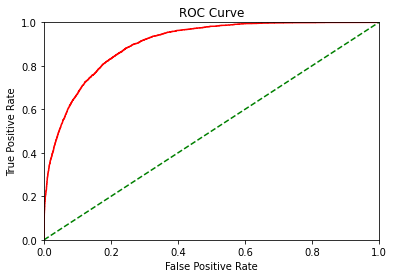

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# changing data into dataframe as the table in class
data = {"predict": ypredprob[:,1],
       "actual": adult50kp['y_test']}
df = pd.DataFrame(data)

# sort prob in ascending order
df = df.sort_values('predict', ascending=False)

# calculate the amount of P and N
P = df[df['actual']==1].shape[0]
N = df[df['actual']==0].shape[0]

# if actual is 1 add one to TP else actual is 0 add one to FP count rate
X = []
y = []
current_X=0
current_y=0
y_count = 0
x_count = 0
for row in df.itertuples():
    if row[2] == 1:
        y_count += 1
        current_y = y_count / P
    else:
        x_count += 1
        current_X = x_count / N
    X.append(current_X)
    y.append(current_y)

# plot curve 
plt.title('ROC Curve')
# draw ROC curve
plt.plot(X, y, color = 'red')
# draw diagonal line
plt.plot([0, 1], [0, 1],'g--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<h3>Q2.2

In [10]:
auc = 0
for i in range(len(X) - 1):
    auc += (1 / 2) * (y[i] + y[i + 1]) * (X[i + 1] - X[i])
print("AUC =", auc)

AUC = 0.903490602398108


<h2>第三題 [Logistic Regression with L2 Regularization]

<h3>Q3.1

#### gradient for the new E(w)
$G = \nabla E(w) = x_{train}^T(y - y_{train})^T + \Lambda w,$

where $y = \frac{1}{1 + exp({-w^T x_{train}^T})}$.

#### hessian matrix for the new E(w)
$H = \nabla \nabla E(w) = x_{train}^T R x_{train} + \Lambda I,$

where $R =$ diagonal matrix with diagonal elements in $ y(1 - y),$

where $y = \frac{1}{1 + exp({-w^T x_{train}^T})}$

<h3>Q3.2

In [11]:
# import packages
import pandas as pd
import numpy as np
import pickle
np.set_printoptions(suppress=True)

In [12]:
class mylogistic_l2():
    def __init__(self, reg_vec, max_iter = 100, tol = 1e-5, add_intercept = True):
        """reg_vec: the regularization coefficient vector
           max_iter: maximum number of iteration to run for the Newton method
           tol: tolerance for the objective function
           add_intercept: whether to add intercept (a column of ones) at last column of the feature matrix"""
        self.reg_vec = np.diag(reg_vec)
        self.max_iter = max_iter
        self.tol = tol
        self.add_intercept = add_intercept

    def fit(self, x, y, verbal = False):
        # Array preprocessing
        if self.add_intercept == True:
            x_train = np.concatenate([x, np.ones((x.shape[0], 1))], axis=1)
        else:
            x_train = np.array(x)
        
        # Ridge regression
        reg_avg = np.trace(self.reg_vec) / self.reg_vec.shape[1]
        self.w = np.dot(np.linalg.inv((reg_avg * np.eye(x_train.shape[1])) + np.dot(x_train.T, x_train)), np.dot(x_train.T, y[np.newaxis].T))
            # calculate loss
        y_arr = 1 / (1 + np.exp(np.dot(-self.w.T, x_train.T)))
        self.L = (1/2) * (np.dot(np.dot(self.w.T, self.reg_vec), self.w)) - (np.dot(y, (np.log(y_arr)).T) + np.dot((1 - y), (np.log(1 - y_arr)).T))
        
        # Logistic Regression with L2 Regularization
        for itr in range(self.max_iter):
                # Newton-Raphson Method
                    # Calculate Gradient
            G = np.dot(x_train.T, (y_arr - y).T) + np.dot(self.reg_vec, self.w)
                    # Calculate Hessian matrix
            H = np.dot(np.dot(x_train.T, np.diag((y_arr * (1 - y_arr)).flatten())), x_train) + self.reg_vec
                    # Calculate new W
            tempW = self.w - np.dot(np.linalg.inv(H), G)
                    
                # calculate loss
            temp_y_arr = 1 / (1 + np.exp(np.dot(-tempW.T, x_train.T)))
            tempL = (1/2) * (np.dot(np.dot(tempW.T, self.reg_vec), tempW)) - (np.dot(y, (np.log(temp_y_arr)).T) + np.dot((1 - y), (np.log(1 - temp_y_arr)).T))
            
                # loss constraint
            if abs(self.L - tempL) < self.tol:
                if self.L > tempL:
                    y_arr = temp_y_arr
                    self.w = tempW
                    self.L = tempL
                break
                
                # save temp to result
            y_arr = temp_y_arr
            self.w = tempW
            self.L = tempL

    def predict(self, x):
        """doing prediction"""
        # add ones to the testing x
        if self.add_intercept == True:
            firstCol = np.ones((x.shape[0], 1))
            ones_x_test = np.concatenate([x, firstCol], axis=1)
        self.predict = np.dot(self.w.T, ones_x_test.T).flatten()
        for i in range(len(self.predict)):
            if self.predict[i] < 0.5:
                self.predict[i] = 0
            else:
                self.predict[i] = 1
        return self.predict, self.L.flatten(), self.w.T.flatten()

In [13]:
# read file
dsfile = 'adult_m50k.pickle'
with open(dsfile, 'rb') as fh1:
    adult50kp = pickle.load(fh1)

X_train = adult50kp["x_train"]
X_test = adult50kp["x_test"]
Y_train = adult50kp["y_train"]
Y_test = adult50kp["y_test"]

### Case 1

In [14]:
# Set lambda
lambda_vec = np.ones(X_train.shape[1] + 1)

# Execute model
logic1 = mylogistic_l2(reg_vec = lambda_vec, max_iter = 1000, tol = 1e-5, add_intercept = True)
logic1.fit(X_train, Y_train)
ypred = logic1.predict(X_test)

In [15]:
# print w
print("w:")
print(ypred[2])

# compute accuracy
ncorrect = np.sum(adult50kp['y_test'] == ypred[0])
accuracy = ncorrect / adult50kp['y_test'].shape[0]
print("Accuracy = %f" % accuracy)

w:
[ 0.25831075  0.35295138  2.33390152  0.75114521  0.33352443  0.07923687
 -0.25930599 -0.03310592 -0.80209231 -1.16328375 -0.15748027  1.06974336
 -0.63384606  0.11673241 -0.23156738 -0.51712221 -0.07972165 -1.0994978
 -0.24602709  0.06196949  0.12668588  0.86265606 -0.91835284 -0.62122618
 -0.20074022 -0.75160098 -1.61011588  0.57582091  0.64899528  0.35374143
  0.71721847 -0.02844947 -0.00095482 -0.1965409  -0.14635164  0.62694627
  0.44820708  0.02459458  0.04692237 -0.49106775 -0.20303542 -0.16330368
 -0.01766235 -0.11132832 -0.09946182 -1.17391916  0.18070268 -0.069272
  0.9764969   0.4609886  -0.49544042 -1.27203531  0.48677241 -0.89896373
 -0.06005426 -0.35084885  0.43281522  0.59412015  0.58215192 -0.62096228
 -0.05974804  0.09290352 -0.1518921  -0.00538529  0.03416091 -0.28908824
  0.15605391  0.49540124  0.89094226  0.14915144  0.34248478 -0.31331216
 -0.35593911 -0.36249461 -0.66724748 -0.40883113  0.44748983  0.13776893
  0.14135123 -0.11601542 -0.05610327 -0.93458304 -0

### Case 2

In [16]:
# Set lambda
lambda_vec = np.ones(X_train.shape[1])
lambda_vec = np.concatenate([lambda_vec, np.array([0])])

# Execute model
logic = mylogistic_l2(reg_vec = lambda_vec, max_iter = 1000, tol = 1e-5, add_intercept = True)
logic.fit(X_train, Y_train)
ypred = logic.predict(X_test)

In [17]:
# print w
print("w:")
print(ypred[2])
# compute accuracy
ncorrect = np.sum(adult50kp['y_test'] == ypred[0])
accuracy = ncorrect / adult50kp['y_test'].shape[0]
print("Accuracy = %f" % accuracy)

w:
[ 0.25833063  0.35307341  2.33348255  0.7378757   0.33385106  0.07926886
 -0.04219572  0.1998764  -0.58360968 -0.93671312  0.07548468  1.28715744
 -0.37140327  0.39422898  0.04305748 -0.26147348  0.19559029 -0.42695771
  0.42695771  0.16424528  0.22840772  0.96472553 -0.81743779 -0.52074423
 -0.09910239 -0.64944042 -1.55235098  0.6786798   0.75066429  0.45541098
  0.81857112  0.07308911  0.0728464  -0.11752644 -0.06282948  0.67242506
  0.5040869   0.08799091  0.11435013 -0.38483984 -0.10196309 -0.05145374
  0.10741777 -0.01997934  0.01717544 -1.16567808  0.30082277  0.02715464
  1.00831207  0.50210397 -0.45756662 -1.24002555  0.52780939 -0.86832688
 -0.02771494 -0.31412701  0.47343435  0.62981111  0.62405658 -0.5867506
 -0.0296708   0.12414401 -0.14376238  0.02434194  0.0621604  -0.24843986
  0.19459429  0.52620501  0.93165615  0.18707696  0.37950109 -0.28749402
 -0.31137357 -0.33290534 -0.65117786 -0.38160106  0.48879121  0.17662205
  0.17410342 -0.07343502 -0.0314651  -0.89846776 

### Case 3

In [18]:
# Set lambda
lambda_vec = []
for i in adult50kp['columnname']:
    if i in adult50kp['num_col']:
        lambda_vec.append(1)
    else:
        lambda_vec.append(0.5)
lambda_vec.append(0)
lambda_vec = np.array(lambda_vec)

# Execute model
logic = mylogistic_l2(reg_vec = lambda_vec, max_iter = 1000, tol = 1e-5, add_intercept = True)
logic.fit(X_train, Y_train)
ypred = logic.predict(X_test)

In [19]:
# print w
print("w:")
print(ypred[2])
# compute accuracy
ncorrect = np.sum(adult50kp['y_test'] == ypred[0])
accuracy = ncorrect / adult50kp['y_test'].shape[0]
print("Accuracy = %f" % accuracy)

w:
[ 0.25851661  0.3533387   2.33562764  0.7825921   0.33439916  0.07940036
 -0.08347988  0.23309134 -0.59278098 -0.9224849   0.11139573  1.25425869
 -0.38299462  0.41291781  0.04136013 -0.26411462  0.19283128 -0.42890321
  0.42890321  0.23635122  0.30021361  1.03810521 -0.75216086 -0.4534137
 -0.02691157 -0.5825269  -2.00075382  0.75127891  0.82696617  0.52830705
  0.89488994  0.14510375  0.18253094 -0.02583999  0.00991404  0.89862004
  0.68517002  0.23294385  0.24519931 -0.38363083 -0.08029608 -0.06493444
  0.0453608   0.03743376 -0.01295908 -2.09374319  0.25763304  0.06659781
  1.18748312  0.55059265 -0.47576613 -1.45842154  0.5822242  -1.0627833
 -0.00957211 -0.31704572  0.52485137  0.73044517  0.67457228 -0.63624179
 -0.00967268  0.17339113 -0.2364757   0.0375474   0.10120874 -0.24679341
  0.23800627  0.64228457  1.00567032  0.23258941  0.42267607 -0.35336167
 -0.29178766 -0.38125401 -0.96291964 -0.45007954  0.512985    0.22019382
  0.22640627 -0.04989103 -0.01836864 -0.95953334  

<h3>Q3.3

In [20]:
from sklearn.model_selection import train_test_split
# Split training data
subtraining_data_x, tuning_data_x, subtraining_data_y, tuning_data_y = train_test_split(adult50kp["x_train"], adult50kp["y_train"], test_size=0.9, random_state=42)

In [21]:
# a_1 = a_2 find best a
    # set grids
grids = [0.01, 0.05, 0.1, 0.3, 0.5, 1, 5, 10, 25, 50, 75, 100]
highest_acc = 0
best_a_grid = 0
for a in grids:
    # Set lambda
    lambda_vec = []
    for i in adult50kp['columnname']:
        lambda_vec.append(a)
    lambda_vec.append(0)
    lambda_vec = np.array(lambda_vec)

    # Execute model
    logic = mylogistic_l2(reg_vec = lambda_vec, max_iter = 1000, tol = 1e-5, add_intercept = True)
    logic.fit(subtraining_data_x, subtraining_data_y)
    ypred = logic.predict(tuning_data_x)
    
    # Compute accuracy
    ncorrect = np.sum(tuning_data_y == ypred[0])
    accuracy = ncorrect / tuning_data_y.shape[0]
    
    # Save best accuracy grid
    if accuracy > highest_acc:
        highest_acc = accuracy
        best_a_grid = a

In [22]:
# fix a_1 find best a_2
# set grids
highest_acc = 0
best_a_2_grid = 0
for a_2 in grids:
    # Set lambda
    lambda_vec = []
    for i in adult50kp['columnname']:
        if i in adult50kp['num_col']:
            lambda_vec.append(best_a_grid)
        else:
            lambda_vec.append(a_2)
    lambda_vec.append(0)
    lambda_vec = np.array(lambda_vec)

    # Execute model
    logic = mylogistic_l2(reg_vec = lambda_vec, max_iter = 1000, tol = 1e-5, add_intercept = True)
    logic.fit(subtraining_data_x, subtraining_data_y)
    ypred = logic.predict(tuning_data_x)
    
    # Compute accuracy
    ncorrect = np.sum(tuning_data_y == ypred[0])
    accuracy = ncorrect / tuning_data_y.shape[0]
    
    # Save best accuracy grid
    if accuracy > highest_acc:
        highest_acc = accuracy
        best_a_2_grid = a_2

In [23]:
# fix a_2 find best a_1
# set grids
highest_acc = 0
best_a_1_grid = 0
for a_1 in grids:
    # Set lambda
    lambda_vec = []
    for i in adult50kp['columnname']:
        if i in adult50kp['num_col']:
            lambda_vec.append(a_1)
        else:
            lambda_vec.append(best_a_2_grid)
    lambda_vec.append(0)
    lambda_vec = np.array(lambda_vec)

    # Execute model
    logic = mylogistic_l2(reg_vec = lambda_vec, max_iter = 1000, tol = 1e-5, add_intercept = True)
    logic.fit(subtraining_data_x, subtraining_data_y)
    ypred = logic.predict(tuning_data_x)
    
    # Compute accuracy
    ncorrect = np.sum(tuning_data_y == ypred[0])
    accuracy = ncorrect / tuning_data_y.shape[0]
    
    # Save best accuracy grid
    if accuracy > highest_acc:
        highest_acc = accuracy
        best_a_1_grid = a_1

In [27]:
print("selected a1 =", best_a_1_grid)
print("selected a2 =", best_a_2_grid)

selected a1 = 0.3
selected a2 = 0.3


In [25]:
# Set lambda
lambda_vec = []
for i in adult50kp['columnname']:
    if i in adult50kp['num_col']:
        lambda_vec.append(0.5)
        # lambda_vec.append(best_a_1_grid)
    else:
        lambda_vec.append(0.5)
        # lambda_vec.append(best_a_2_grid)
lambda_vec.append(0)
lambda_vec = np.array(lambda_vec)

# Execute model
logic = mylogistic_l2(reg_vec = lambda_vec, max_iter = 1000, tol = 1e-5, add_intercept = True)
logic.fit(X_train, Y_train)
ypred = logic.predict(X_test)

# Compute accuracy
ncorrect = np.sum(adult50kp['y_test'] == ypred[0])
accuracy = ncorrect / adult50kp['y_test'].shape[0]
print("Accuracy = %f" % accuracy)

Accuracy = 0.841434


<h3>Q3.4

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# hyperparameter tuning
# Grid search and Logistic Regression with one hyperparameter
grid = {"C": grids}
logreg = LogisticRegression(penalty = "l2", solver = 'newton-cg', max_iter = 1000)
logreg_cv = GridSearchCV(logreg, grid)
logreg_cv.fit(adult50kp['x_train'], adult50kp['y_train'])
print(logreg_cv.best_params_)

# make prediction
ypred = logreg_cv.predict(adult50kp['x_test'])
ypredprob = logreg_cv.predict_proba(adult50kp['x_test'])

# compute accuracy
ncorrect = np.sum(adult50kp['y_test'] == ypred)
accuracy_sk = ncorrect / adult50kp['y_test'].shape[0]
print("Accuracy = %f" % accuracy_sk)

{'C': 0.3}
Accuracy = 0.848406


The hyperparameters chosen is the same as mylogistic_l2 model, they all suggest a1 and a2 to be 0.3, the accuracy is similar too.

Reference:<br>
Q2.1 https://ithelp.ithome.com.tw/articles/10229049<br>